In [1]:
from settings import *

# Analyze All Models

Gather data from final runs of all models and generate summaries and plots. The version number at the end of each model name determines the epsilon value used with the mapping being made in `MODELS_TO_SETTINGS` below.

In [2]:
from utils import fetch_files_from_folder

MODELS_RL_ROOT = "models/RL/"

[ x.split("/")[3] for x in fetch_files_from_folder(MODELS_RL_ROOT, [".pkg"])]

['drugex-led3-qsar-led3-casp10k-v3',
 'drugex-led3-qsar-zinc-chembl200k-v6',
 'drugex-led3-qsar-led3-chembl200k-v5',
 'drugex-led3-qsar-zinc-casp10k-v1',
 'drugex-led3-qsar-sascore-v9',
 'drugex-led3-qsar-v1',
 'drugex-led3-qsar-v6',
 'drugex-led3-qsar-led3-chembl200k-v2',
 'drugex-led3-qsar-zinc-casp10k-v6',
 'drugex-led3-qsar-led3-casp10k-v4',
 'drugex-led3-qsar-zinc-chembl200k-v1',
 'drugex-led3-qsar-zinc-chembl200k-v5',
 'drugex-led3-qsar-zinc-casp10k-v2',
 'drugex-led3-qsar-led3-chembl200k-v6',
 'drugex-led3-qsar-v2',
 'drugex-led3-qsar-v5',
 'drugex-led3-qsar-zinc-casp10k-v5',
 'drugex-led3-qsar-sascore-v7',
 'drugex-led3-qsar-led3-chembl200k-v1',
 'drugex-led3-qsar-zinc-chembl200k-v2',
 'drugex-led3-qsar-sascore-v10',
 'drugex-led3-qsar-led3-casp10k-v5',
 'drugex-led3-qsar-sascore-v5',
 'drugex-led3-qsar-led3-chembl200k-v3',
 'drugex-led3-qsar-sascore-v8',
 'drugex-led3-qsar-led3-chembl200k-v4',
 'drugex-led3-qsar-led3-casp10k-v2',
 'drugex-led3-qsar-led3-casp10k-v6',
 'drugex-l

In [3]:
MODELS_TO_SETTINGS = {
    'drugex-led3-qsar-led3-chembl200k-v1' : dict(e=0.2),
    'drugex-led3-qsar-v1' : dict(e=0.2),
    'drugex-led3-qsar-v2' : dict(e=0.01),
    'drugex-led3-qsar-v3' : dict(e=0.4),
    'drugex-led3-qsar-v4' : dict(e=0.6),
    'drugex-led3-qsar-v5' : dict(e=0.8),
    'drugex-led3-qsar-v6' : dict(e=0.99),
    'drugex-led3-qsar-led3-casp10k-v3' : dict(e=0.4),
    'drugex-led3-qsar-zinc-chembl200k-v6' : dict(e=0.99),
    'drugex-led3-qsar-led3-chembl200k-v5' : dict(e=0.8),
    'drugex-led3-qsar-led3-chembl200k-v2' : dict(e=0.01),
    'drugex-led3-qsar-zinc-casp10k-v6' : dict(e=0.99),
    'drugex-led3-qsar-led3-casp10k-v4' : dict(e=0.6),
    'drugex-led3-qsar-zinc-casp10k-v1' : dict(e=0.2),
    'drugex-led3-qsar-zinc-chembl200k-v5' : dict(e=0.8),
    'drugex-led3-qsar-zinc-casp10k-v2' : dict(e=0.01),
    'drugex-led3-qsar-led3-chembl200k-v6' : dict(e=0.99),
    'drugex-led3-qsar-zinc-casp10k-v5' : dict(e=0.8),
    'drugex-led3-qsar-sascore-v7' : dict(e=0.6),
    'drugex-led3-qsar-zinc-chembl200k-v2' : dict(e=0.01),
    'drugex-led3-qsar-sascore-v8' : dict(e=0.8),
    'drugex-led3-qsar-sascore-v9' : dict(e=0.99),
    'drugex-led3-qsar-sascore-v10' : dict(e=0.2),
    'drugex-led3-qsar-led3-casp10k-v5' : dict(e=0.8),
    'drugex-led3-qsar-led3-casp10k-v1' : dict(e=0.2),
    'drugex-led3-qsar-sascore-v5' : dict(e=0.01),
    'drugex-led3-qsar-led3-chembl200k-v3' : dict(e=0.4),
    'drugex-led3-qsar-led3-chembl200k-v4' : dict(e=0.6),
    'drugex-led3-qsar-led3-casp10k-v2' : dict(e=0.01),
    'drugex-led3-qsar-led3-casp10k-v6' : dict(e=0.99),
    'drugex-led3-qsar-zinc-chembl200k-v3' : dict(e=0.4),
    'drugex-led3-qsar-sascore-v6' : dict(e=0.4),
    'drugex-led3-qsar-zinc-casp10k-v4' : dict(e=0.6),
    'drugex-led3-qsar-zinc-casp10k-v3' : dict(e=0.4),
    'drugex-led3-qsar-zinc-chembl200k-v4' : dict(e=0.6),
    'drugex-led3-qsar-zinc-chembl200k-v1' : dict(e=0.2),
}

predictor_keys = ['LED3Scorer', 'XGBClassifier', 'XGBRegressor', 'SA']

In [4]:
def create_summary(df_raw_smiles):
    ignored_scores = ["XGBRegressor"]
    if "SA" not in df_raw_smiles.columns:
        ignored_scores.append("SA")
    if "LED3Scorer" not in df_raw_smiles.columns:
        ignored_scores.append("LED3Scorer")
    scores_dict = {key: (key, np.mean) for key in predictor_keys if key not in ignored_scores}
    df_summary = df_raw_smiles.groupby(['Epoch']).aggregate(
        Desirability=('DESIRE', np.mean),
        **scores_dict
    )

    df_summary['Epoch'] = df_summary.index
    
    return df_summary

In [5]:
def fetch_data(models, ext, summary=None):
    paths = {x.split("/")[3] : x for x in fetch_files_from_folder(MODELS_RL_ROOT, [ext]) if x.split("/")[3] in models}
    dfs = []
    for key, path in zip(paths.keys(), paths.values()):
        df = pd.read_table(path)
        # generate unique SMILES
        if 'Smiles' in df.columns:
            df_smiles_unique = pd.DataFrame(columns=df.columns)
            for epoch, df_slice in df.groupby("Epoch"):
                # needs to be done per epoch to reflect the same filtering as used in early stopping (see https://github.com/CDDLeiden/DrugEx/blob/3f08e06fa98f8c5648c7cbb49109a3690e2750ca/drugex/training/models/explorer.py#L228)
                df_smiles_unique = pd.concat([df_smiles_unique, df_slice.drop_duplicates(subset=['Smiles'])])

            # print(f"Dropping {len(df) - len(df_smiles_unique)} non-unique SMILES for {path}")
            df = df_smiles_unique
        
        df = summary(df) if summary else df
        eps = models[key]['e']
        df["Name"] = f"{key}-e={eps}"
        df["epsilon"] = eps
        
        dfs.append(df)
    return pd.concat(dfs)

fit_data = fetch_data(MODELS_TO_SETTINGS, "_fit.tsv")
fit_data

,epoch,loss_train,loss_valid,valid_ratio,unique_ratio,desire_ratio,mean_train_loss,Name,epsilon
0,1,NaN,NaN,0.996334,0.995112,NaN,0.219359,drugex-led3-qsar-led3-casp10k-v3-e=0.4,0.4
1,2,NaN,NaN,0.994705,0.991446,NaN,0.201704,drugex-led3-qsar-led3-casp10k-v3-e=0.4,0.4
2,3,NaN,NaN,0.996334,0.992261,NaN,0.179060,drugex-led3-qsar-led3-casp10k-v3-e=0.4,0.4
3,4,NaN,NaN,0.996741,0.989613,NaN,0.170569,drugex-led3-qsar-led3-casp10k-v3-e=0.4,0.4
4,5,NaN,NaN,0.996334,0.988187,NaN,0.198798,drugex-led3-qsar-led3-casp10k-v3-e=0.4,0.4
...,...,...,...,...,...,...,...,...,...
95,96,NaN,NaN,0.997760,0.884929,NaN,0.145316,drugex-led3-qsar-zinc-chembl200k-v4-e=0.6,0.6
96,97,NaN,NaN,0.996945,0.872301,NaN,0.144351,drugex-led3-qsar-zinc-chembl200k-v4-e=0.6,0.6
97,98,NaN,NaN,0.995723,0.870876,NaN,0.149596,drugex-led3-qsar-zinc-chembl200k-v4-e=0.6,0.6
98,99,NaN,NaN,0.996741,0.860285,NaN,0.146694,drugex-led3-qsar-zinc-chembl200k-v4-e=0.6,0.6


In [6]:
summary = fetch_data(MODELS_TO_SETTINGS, "_smiles.tsv", summary=create_summary)
summary

,Desirability,LED3Scorer,XGBClassifier,Epoch,Name,epsilon,SA
Epoch,,,,,,,
1,0.126835,0.589733,0.351457,1,drugex-led3-qsar-led3-casp10k-v3-e=0.4,0.4,NaN
2,0.144054,0.607031,0.361166,2,drugex-led3-qsar-led3-casp10k-v3-e=0.4,0.4,NaN
3,0.168098,0.646196,0.374250,3,drugex-led3-qsar-led3-casp10k-v3-e=0.4,0.4,NaN
4,0.178051,0.651173,0.391866,4,drugex-led3-qsar-led3-casp10k-v3-e=0.4,0.4,NaN
5,0.186242,0.625209,0.423441,5,drugex-led3-qsar-led3-casp10k-v3-e=0.4,0.4,NaN
...,...,...,...,...,...,...,...
96,0.396694,0.708042,0.609522,96,drugex-led3-qsar-zinc-chembl200k-v4-e=0.6,0.6,NaN
97,0.381518,0.718563,0.576175,97,drugex-led3-qsar-zinc-chembl200k-v4-e=0.6,0.6,NaN
98,0.373284,0.717902,0.569724,98,drugex-led3-qsar-zinc-chembl200k-v4-e=0.6,0.6,NaN


In [7]:
MODEL_NAMES = [
    "Baseline",
    "SAScore",
    "LED3Score-Casp10k",
    "LED3Score-ChEMBL200k",
    "ZINCScore-casp10k",
    "ZINCScore-ChEMBL200k",
]

def get_mask(model, data):
    return {
        "Baseline" : data.Name.str.startswith("baseline_qsar") | data.Name.str.startswith("drugex-led3-qsar-v"),
        "SAScore":  data.Name.str.startswith("drugex-led3-qsar-sascore"),
        "LED3Score-Casp10k":  data.Name.str.startswith("drugex-led3-qsar-led3-casp10k") | \
                            data.Name.str.startswith("casp10k_led3score_400ep_final"),
        "LED3Score-ChEMBL200k":  data.Name.str.startswith("drugex-led3-qsar-led3-chembl200k") | \
                            data.Name.str.startswith("chembl200k_led3score"),
        "ZINCScore-casp10k":  data.Name.str.startswith("drugex-led3-qsar-zinc-casp10k") | \
                            data.Name.str.startswith("caspyrus10k_zincscore"),
        "ZINCScore-ChEMBL200k":  data.Name.str.startswith("drugex-led3-qsar-zinc-chembl200k") | \
                            data.Name.str.startswith("chembl200k_zincscore"),
    }[model]

subsets = []
for model_name in MODEL_NAMES:
    print(model_name)
    mask = get_mask(model_name, fit_data)
    subset = fit_data[mask].sort_values("epsilon")
    subset.epsilon = subset.epsilon.apply(str)
    subset["Epoch"] = subset.epoch
    subset.Name = model_name
    subsets.append(subset)

fit_data_renamed = pd.concat(subsets)
fit_data.groupby(["epsilon", "Name"]).aggregate(max)

Baseline
SAScore
LED3Score-Casp10k
LED3Score-ChEMBL200k
ZINCScore-casp10k
ZINCScore-ChEMBL200k


epoch  loss_train  \
epsilon Name                                                            
0.01    drugex-led3-qsar-led3-casp10k-v2-e=0.01       100         NaN   
        drugex-led3-qsar-led3-chembl200k-v2-e=0.01    100         NaN   
        drugex-led3-qsar-sascore-v5-e=0.01            100         NaN   
        drugex-led3-qsar-v2-e=0.01                    100         NaN   
        drugex-led3-qsar-zinc-casp10k-v2-e=0.01       112         NaN   
        drugex-led3-qsar-zinc-chembl200k-v2-e=0.01    100         NaN   
0.20    drugex-led3-qsar-led3-casp10k-v1-e=0.2        371         NaN   
        drugex-led3-qsar-led3-chembl200k-v1-e=0.2     153         NaN   
        drugex-led3-qsar-sascore-v10-e=0.2            100         NaN   
        drugex-led3-qsar-v1-e=0.2                     180         NaN   
        drugex-led3-qsar-zinc-casp10k-v1-e=0.2        176         NaN   
        drugex-led3-qsar-zinc-chembl200k-v1-e=0.2     113         NaN   
0.40    drugex-led3-qsar-led3-casp10k-v3-e=0.4        120         NaN   
        drugex-led3-qsar-led3-chembl200k-v3-e=0.4     101         NaN   
        drugex-led3-qsar-sascore-v6-e=0.4             107         NaN   
        drugex-led3-qsar-v3-e=0.4                     183         NaN   
        drugex-led3-qsar-zinc-casp10k-v3-e=0.4        118         NaN   
        drugex-led3-qsar-zinc-chembl200k-v3-e=0.4     103         NaN   
0.60    drugex-led3-qsar-led3-casp10k-v4-e=0.6        100         NaN   
        drugex-led3-qsar-led3-chembl200k-v4-e=0.6     100         NaN   
        drugex-led3-qsar-sascore-v7-e=0.6             100         NaN   
        drugex-led3-qsar-v4-e=0.6                     100         NaN   
        drugex-led3-qsar-zinc-casp10k-v4-e=0.6        123         NaN   
        drugex-led3-qsar-zinc-chembl200k-v4-e=0.6     100         NaN   
0.80    drugex-led3-qsar-led3-casp10k-v5-e=0.8        100         NaN   
        drugex-led3-qsar-led3-chembl200k-v5-e=0.8     100         NaN   
        drugex-led3-qsar-sascore-v8-e=0.8             100         NaN   
        drugex-led3-qsar-v5-e=0.8                     116         NaN   
        drugex-led3-qsar-zinc-casp10k-v5-e=0.8        100         NaN   
        drugex-led3-qsar-zinc-chembl200k-v5-e=0.8     100         NaN   
0.99    drugex-led3-qsar-led3-casp10k-v6-e=0.99       100         NaN   
        drugex-led3-qsar-led3-chembl200k-v6-e=0.99    100         NaN   
        drugex-led3-qsar-sascore-v9-e=0.99            100         NaN   
        drugex-led3-qsar-v6-e=0.99                    100         NaN   
        drugex-led3-qsar-zinc-casp10k-v6-e=0.99       100         NaN   
        drugex-led3-qsar-zinc-chembl200k-v6-e=0.99    100         NaN   

                                                    loss_valid  valid_ratio  \
epsilon Name                                                                  
0.01    drugex-led3-qsar-led3-casp10k-v2-e=0.01            NaN     0.997963   
        drugex-led3-qsar-led3-chembl200k-v2-e=0.01         NaN     0.998167   
        drugex-led3-qsar-sascore-v5-e=0.01                 NaN     0.998167   
        drugex-led3-qsar-v2-e=0.01                         NaN     0.998371   
        drugex-led3-qsar-zinc-casp10k-v2-e=0.01            NaN     0.998574   
        drugex-led3-qsar-zinc-chembl200k-v2-e=0.01         NaN     0.996741   
0.20    drugex-led3-qsar-led3-casp10k-v1-e=0.2             NaN     1.000000   
        drugex-led3-qsar-led3-chembl200k-v1-e=0.2          NaN     0.998574   
        drugex-led3-qsar-sascore-v10-e=0.2                 NaN     0.998371   
        drugex-led3-qsar-v1-e=0.2                          NaN     0.998167   
        drugex-led3-qsar-zinc-casp10k-v1-e=0.2             NaN     0.999185   
        drugex-led3-qsar-zinc-chembl200k-v1-e=0.2          NaN     0.998167   
0.40    drugex-led3-qsar-led3-casp10k-v3-e=0.4             NaN     0.998574   
        drugex-led3-qsar-led3-chembl200k-v3-e=0.4          NaN     0.998982   
        druge

In [8]:
subsets_sm = []
for model_name in MODEL_NAMES:
    print(model_name)
    mask = get_mask(model_name, summary)
    subset = summary[mask].sort_values("epsilon")
    # subset.epsilon = subset.epsilon.apply(str)
    subset.Name = model_name
    subsets_sm.append(subset)

summary_renamed = pd.concat(subsets_sm)
summary_renamed.groupby(["epsilon", "Name"]).aggregate(max)

Baseline
SAScore
LED3Score-Casp10k
LED3Score-ChEMBL200k
ZINCScore-casp10k
ZINCScore-ChEMBL200k


Desirability  LED3Scorer  XGBClassifier  Epoch  \
epsilon Name                                                                   
0.01    Baseline                  0.988595         NaN       0.971302    100   
        LED3Score-Casp10k         0.105081    0.572371       0.968743    100   
        LED3Score-ChEMBL200k      0.094733    0.539009       0.972512    100   
        SAScore                   0.239215         NaN       0.276351    100   
        ZINCScore-ChEMBL200k      0.158109    0.711948       0.949359    100   
        ZINCScore-casp10k         0.870658    0.895243       0.931185    112   
0.20    Baseline                  0.972466         NaN       0.951107    180   
        LED3Score-Casp10k         0.724490    0.773272       0.952355    371   
        LED3Score-ChEMBL200k      0.495513    0.545316       0.912956    153   
        SAScore                   0.239829         NaN       0.268057    100   
        ZINCScore-ChEMBL200k      0.558317    0.711183       0.887106    113   
        ZINCScore-casp10k         0.802691    0.881004       0.877573    176   
0.40    Baseline                  0.914375         NaN       0.886803    183   
        LED3Score-Casp10k         0.361272    0.651173       0.707482    120   
        LED3Score-ChEMBL200k      0.325717    0.659987       0.763273    101   
        SAScore                   0.405399         NaN       0.450166    107   
        ZINCScore-ChEMBL200k      0.437666    0.833372       0.774402    103   
        ZINCScore-casp10k         0.486269    0.888416       0.646525    118   
0.60    Baseline                  0.747740         NaN       0.733299    100   
        LED3Score-Casp10k         0.314107    0.711763       0.668522    100   
        LED3Score-ChEMBL200k      0.303468    0.667482       0.630390    100   
        SAScore                   0.481952         NaN       0.511008    100   
        ZINCScore-ChEMBL200k      0.409452    0.812319       0.609522    100   
        ZINCScore-casp10k         0.473362    0.892998       0.598696    123   
0.80    Baseline                  0.629203         NaN       0.626299    116   
        LED3Score-Casp10k         0.296628    0.717907       0.611546    100   
        LED3Score-ChEMBL200k      0.314684    0.700985       0.597736    100   
        SAScore                   0.494082         NaN       0.516858    100   
        ZINCScore-ChEMBL200k      0.400504    0.836385       0.596192    100   
        ZINCScore-casp10k         0.445971    0.879519       0.586075    100   
0.99    Baseline                  0.620247         NaN       0.611650    100   
        LED3Score-Casp10k         0.301640    0.748726       0.568421    100   
        LED3Score-ChEMBL200k      0.299355    0.719003       0.570598    100   
        SAScore                   0.512311         NaN       0.523828    100   
        ZINCScore-ChEMBL200k      0.405183    0.837800       0.595960    100   
        ZINCScore-casp10k         0.446767    0.886385       0.563881    100   

                                    SA  
epsilon Name                            
0.01    Baseline                   NaN  
        LED3Score-Casp10k          NaN  
        LED3Score-ChEMBL200k       NaN  
        SAScore               0.974199  
        ZINCScore-ChEMBL200k       NaN  
        ZINCScore-casp10k          NaN  
0.20    Baseline                   NaN  
        LED3Score-Casp10k          NaN  
        LED3Score-ChEMBL200k       NaN  
        SAScore               0.970135  
        ZINCScore-ChEMBL200k       NaN  
        ZINCScore-casp10k          NaN  
0.40    Baseline                   NaN  
        LED3Score-Casp10k          NaN  
        LED3Score-ChEMBL200k       NaN  
        SAScore               0.965097  
        ZINCScore-ChEMBL200k       NaN  
        ZINCScore-casp10k          NaN  
0.60    Baseline                   NaN  
        LED3Score-Casp10k          NaN  
        LED3Score-ChEMBL200k       NaN  
        SAScore               0.963291  
     

In [9]:
maximums = summary_renamed.groupby(["epsilon", "Name"]).aggregate(max)
maximums.reset_index(inplace=True)
maximums

,epsilon,Name,Desirability,LED3Scorer,XGBClassifier,Epoch,SA
0,0.01,Baseline,0.988595,NaN,0.971302,100,NaN
1,0.01,LED3Score-Casp10k,0.105081,0.572371,0.968743,100,NaN
2,0.01,LED3Score-ChEMBL200k,0.094733,0.539009,0.972512,100,NaN
3,0.01,SAScore,0.239215,NaN,0.276351,100,0.974199
4,0.01,ZINCScore-ChEMBL200k,0.158109,0.711948,0.949359,100,NaN
5,0.01,ZINCScore-casp10k,0.870658,0.895243,0.931185,112,NaN
6,0.20,Baseline,0.972466,NaN,0.951107,180,NaN
7,0.20,LED3Score-Casp10k,0.724490,0.773272,0.952355,371,NaN
8,0.20,LED3Score-ChEMBL200k,0.495513,0.545316,0.912956,153,NaN
9,0.20,SAScore,0.239829,NaN,0.268057,100,0.970135


In [10]:
summary_renamed.to_csv(f"{MODELS_RL_ROOT}/summary.tsv", sep="\t", index=False)
fit_data_renamed.to_csv(f"{MODELS_RL_ROOT}/fit_data.tsv", sep="\t", index=False)

<AxesSubplot: xlabel='epsilon', ylabel='Desirability'>

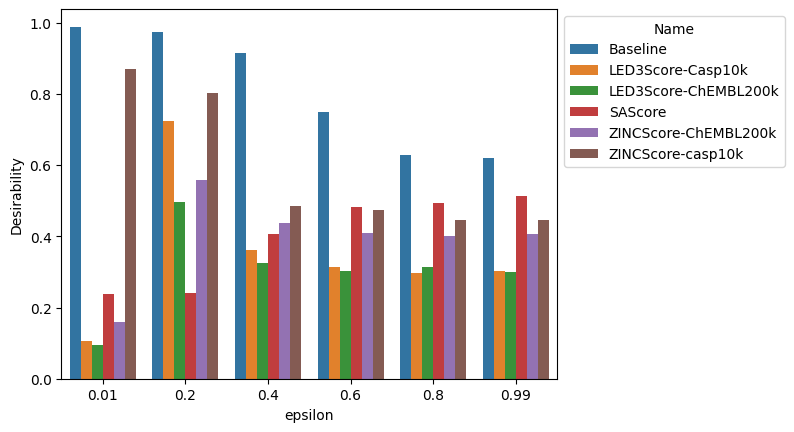

In [11]:
import seaborn as sns

g = sns.barplot(
    data=maximums,
    x="epsilon",
    y="Desirability",
    hue="Name"
)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g

<AxesSubplot: title={'center': 'LED3Score-Casp10k unique_ratio'}, xlabel='Epoch', ylabel='unique_ratio'>

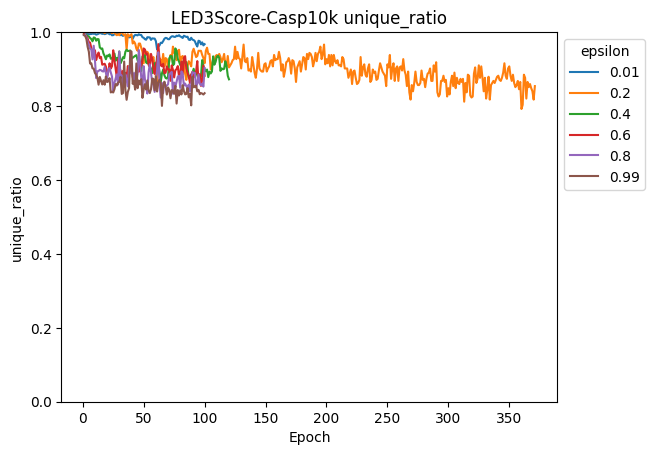

In [16]:
def get_epsilon_plot(data, target, model_name):
    g = sns.lineplot(data=data[data.Name == model_name], x="Epoch", y=target, hue="epsilon")
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
    g.set(title=target)
    g.set(ylim=(0, 1))
    g.set_title(model_name + " " + target)
    return g

get_epsilon_plot(fit_data_renamed, "unique_ratio", "LED3Score-Casp10k")

<AxesSubplot: title={'center': 'LED3Score-Casp10k Desirability'}, xlabel='Epoch', ylabel='Desirability'>

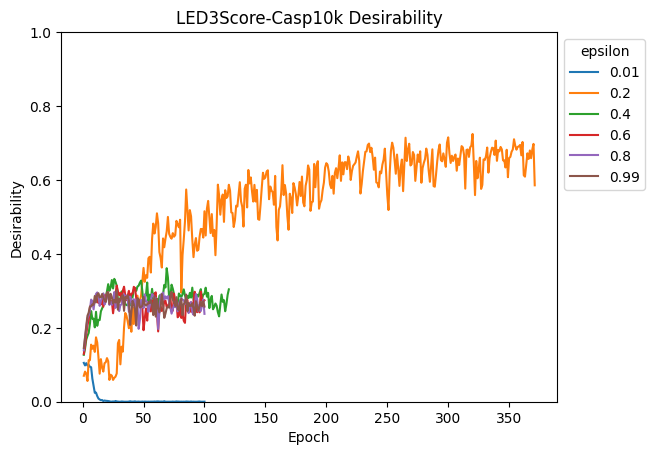

In [23]:
summary_renamed.epsilon = summary_renamed.epsilon.astype(str)
get_epsilon_plot(summary_renamed, "Desirability", "LED3Score-Casp10k")

<AxesSubplot: title={'center': 'LED3Score-Casp10k XGBClassifier'}, xlabel='Epoch', ylabel='XGBClassifier'>

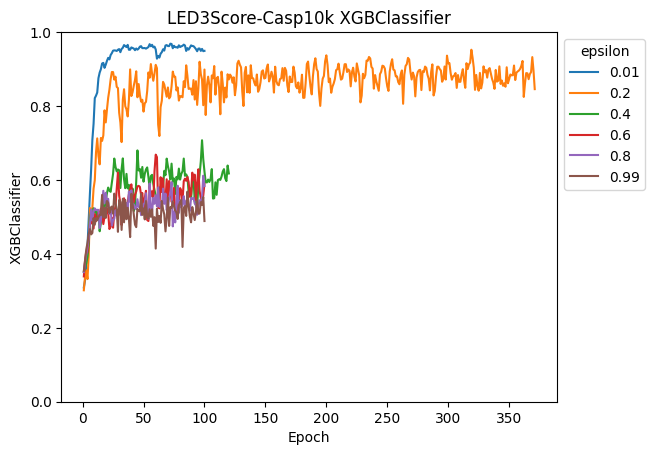

In [24]:
get_epsilon_plot(summary_renamed, "XGBClassifier", "LED3Score-Casp10k")

<AxesSubplot: title={'center': 'LED3Score-Casp10k LED3Scorer'}, xlabel='Epoch', ylabel='LED3Scorer'>

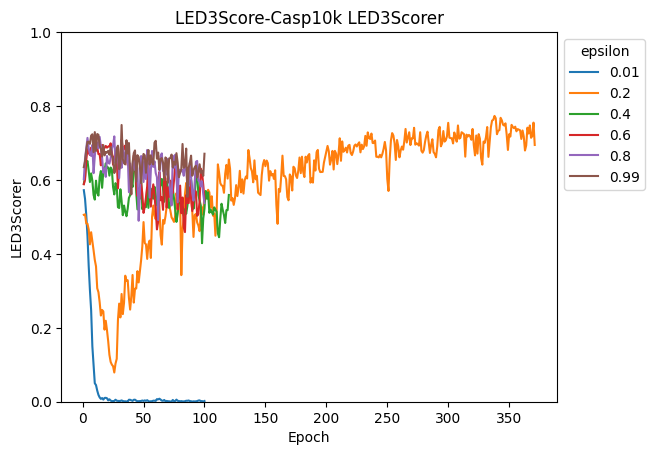

In [26]:
get_epsilon_plot(summary_renamed, "LED3Scorer", "LED3Score-Casp10k")